INFORMAÇÕES SOBRE AS BIBLIOTECAS UTILIZADAS:

pandas: Uma biblioteca de manipulação e análise de dados que nos permite trabalhar com DataFrames, facilitando a organização e manipulação dos dados.

numpy: Uma biblioteca para trabalhar com arrays e realizar operações matemáticas em grande escala.

matplotlib.pyplot: Uma biblioteca de gráficos 2D para criar visualizações estáticas, animadas e interativas em Python.

seaborn: Uma biblioteca de visualização de dados baseada no matplotlib que fornece uma interface de alto nível para criar gráficos estatísticos informativos.

sklearn.model_selection.train_test_split: Uma função para dividir os conjuntos de dados em conjuntos de treinamento e teste, o que nos ajuda a avaliar o desempenho de nossos modelos de Machine Learning.

sklearn.metrics.mean_absolute_error: Uma função para calcular o erro médio absoluto, que é uma métrica de avaliação do desempenho do modelo.

sklearn.metrics.mean_squared_error: Uma função para calcular o erro quadrático médio, que é outra métrica de avaliação do desempenho do modelo.

sklearn.metrics.r2_score: Uma função para calcular o coeficiente de determinação R², que indica o quanto o modelo explica a variação nos dados.

sklearn.impute.SimpleImputer: Uma classe para preencher valores ausentes nos dados usando várias estratégias, como média, mediana ou mais frequente.

sklearn.preprocessing.StandardScaler: Uma classe para padronizar os dados removendo a média e escalonando para a variância unitária.


xgboost.XGBRegressor: Uma classe para treinar um modelo de regressão baseado no algoritmo XGBoost, que é um algoritmo de aprendizado de máquina baseado em árvore de aumento de gradiente.

datetime: Uma biblioteca para trabalhar com datas e horários em Python.

sklearn.ensemble.RandomForestRegressor: Uma classe para treinar um modelo de regressão baseado no algoritmo Random Forest, que é um algoritmo de aprendizado de máquina baseado em árvores de decisão.

sklearn.feature_selection.RFE: Uma classe para realizar a seleção de recursos usando eliminação recursiva de recursos, que é uma técnica para selecionar as variáveis mais importantes para o modelo.


As bibliotecas e funções mencionadas acima foram utilizadas em nosso projeto para pré-processar os dados, treinar e avaliar modelos de Machine Learning e criar visualizações para entender melhor os dados e os resultados.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE



O conjunto de dados foi coletado do repositório "Our World in Data", que mantém um arquivo CSV atualizado com informações detalhadas sobre a pandemia de COVID-19 em todo o mundo. Você pode encontrar mais informações sobre este conjunto de dados e as fontes de dados utilizadas no site oficial do Our World in Data: https://ourworldindata.org/coronavirus

No nosso caso, filtramos os dados para incluir apenas informações relacionadas ao Brasil. As variáveis do conjunto de dados representam diversos aspectos da pandemia, incluindo estatísticas de saúde, medidas de contenção e vacinação. Algumas das variáveis que analisamos incluem:


Lembre-se de que esses dados são coletados de várias fontes, como a Organização Mundial da Saúde (OMS), governos nacionais e pesquisadores independentes. A qualidade e a atualização dos dados podem variar dependendo da fonte e do país.

In [4]:
#  Carregar e filtrar os dados:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Filtrar os dados do Brasil
br_data = df[df["location"] == "Brazil"].copy()

O comando br_data.columns retorna um objeto Index contendo os nomes das colunas do DataFrame br_data. Ele nos ajuda a visualizar todas as colunas presentes no conjunto de dados e entender quais variáveis estão disponíveis para análise e modelagem. Ao analisar os nomes das colunas, podemos identificar quais colunas são relevantes para o problema em questão e quais podem ser removid
as ou transformadas durante o pré-processamento dos dados.

In [5]:
br_data.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Depois com base nos nomes de colunas, vou corverter os nomes para português para facilitar o entendimento do que estou trabalhando.

In [6]:
br_data.rename(columns={
    'iso_code': 'codigo_iso',
    'continent': 'continente',
    'location': 'localizacao',
    'date': 'data',
    'total_cases': 'casos_totais',
    'new_cases': 'novos_casos',
    'new_cases_smoothed': 'novos_casos_suavizados',
    'total_deaths': 'mortes_totais',
    'new_deaths': 'novas_mortes',
    'new_deaths_smoothed': 'novas_mortes_suavizadas',
    'total_cases_per_million': 'casos_totais_por_milhao',
    'new_cases_per_million': 'novos_casos_por_milhao',
    'new_cases_smoothed_per_million': 'novos_casos_suavizados_por_milhao',
    'total_deaths_per_million': 'mortes_totais_por_milhao',
    'new_deaths_per_million': 'novas_mortes_por_milhao',
    'new_deaths_smoothed_per_million': 'novas_mortes_suavizadas_por_milhao',
    'reproduction_rate': 'taxa_reproducao',
    'icu_patients': 'pacientes_uti',
    'icu_patients_per_million': 'pacientes_uti_por_milhao',
    'hosp_patients': 'pacientes_internados',
    'hosp_patients_per_million': 'pacientes_internados_por_milhao',
    'weekly_icu_admissions': 'admissoes_uti_semanais',
    'weekly_icu_admissions_per_million': 'admissoes_uti_semanais_por_milhao',
    'weekly_hosp_admissions': 'admissoes_hospitalares_semanais',
    'weekly_hosp_admissions_per_million': 'admissoes_hospitalares_semanais_por_milhao',
    'total_tests': 'testes_totais',
    'new_tests': 'novos_testes',
    'total_tests_per_thousand': 'testes_totais_por_mil',
    'new_tests_per_thousand': 'novos_testes_por_mil',
    'new_tests_smoothed': 'novos_testes_suavizados',
    'new_tests_smoothed_per_thousand': 'novos_testes_suavizados_por_mil',
    'positive_rate': 'taxa_positividade',
    'tests_per_case': 'testes_por_caso',
    'tests_units': 'unidades_testes',
    'total_vaccinations': 'vacinacoes_totais',
    'people_vaccinated': 'pessoas_vacinadas',
    'people_fully_vaccinated': 'pessoas_totalmente_vacinadas',
    'total_boosters': 'reforcos_totais',
    'new_vaccinations': 'novas_vacinacoes',
    'new_vaccinations_smoothed': 'novas_vacinacoes_suavizadas',
    'total_vaccinations_per_hundred': 'vacinacoes_totais_por_cem',
    'people_vaccinated_per_hundred': 'pessoas_vacinadas_por_cem',
    'people_fully_vaccinated_per_hundred': 'pessoas_totalmente_vacinadas_por_cem',
    'total_boosters_per_hundred': 'reforcos_totais_por_cem',
    'new_vaccinations_smoothed_per_million': 'novas_vacinacoes_suavizadas_por_milhao',
    'new_people_vaccinated_smoothed': 'novas_pessoas_vacinadas_suavizadas',
    'new_people_vaccinated_smoothed_per_hundred': 'novas_pessoas_vacinadas_suavizadas_por_cem',
    'stringency_index': 'indice_rigor',
    'population_density': 'densidade_populacional',
    'median_age': 'idade_media',
    'aged_65_older': 'populacao_65_anos_ou_mais',
    'aged_70_older': 'populacao_70_anos_ou_mais',
    'gdp_per_capita': 'pib_per_capita',
    'extreme_poverty': 'pobreza_extrema',
    'cardiovasc_death_rate': 'taxa_mortalidade_cardiovascular',
    'diabetes_prevalence': 'prevalencia_diabetes',
    'female_smokers': 'fumantes_mulheres',
    'male_smokers': 'fumantes_homens',
    'handwashing_facilities': 'instalacoes_lavagem_maos',
    'hospital_beds_per_thousand': 'leitos_hospitalares_por_mil',
    'life_expectancy': 'expectativa_vida',
    'human_development_index': 'indice_desenvolvimento_humano',
    'population': 'populacao',
    'excess_mortality_cumulative_absolute': 'mortalidade_excessiva_acumulada_absoluta',
    'excess_mortality_cumulative': 'mortalidade_excessiva_acumulada',
    'excess_mortality': 'mortalidade_excessiva',
    'excess_mortality_cumulative_per_million': 'mortalidade_excessiva_acumulada_por_milhao'
}, inplace=True)



Neste trecho de código, convertemos a coluna 'date' do DataFrame br_data para o formato datetime. O objetivo dessa conversão é facilitar o trabalho com datas durante a análise e manipulação dos dados

In [7]:
# Aqui, convertemos a coluna 'date' para o formato datetime, o que facilita o trabalho com datas.

br_data["date"] = pd.to_datetime(br_data["data"])

In [8]:
#Salvar o dataframe original
data_original = br_data

Estou tratando os valores ausentes (NaN) no DataFrame br_data usando o método de preenchimento "forward fill" (ffill) seguido do método "backward fill" (bfill).

fillna(method='ffill'): O método "forward fill" (ffill) preenche os valores ausentes propagando o último valor válido observado antes do valor ausente. Em outras palavras, ele copia o valor da célula anterior (que não é NaN) e preenche a célula com o valor ausente.

fillna(method='bfill'): O método "backward fill" (bfill) preenche os valores ausentes propagando o próximo valor válido observado após o valor ausente. Similarmente ao "forward fill", ele copia o valor da próxima célula (que não é NaN) e preenche a célula com o valor ausente.

Ao encadear esses dois métodos juntos, br_data.fillna(method='ffill').fillna(method='bfill'), estamos garantindo que os valores ausentes sejam preenchidos com o valor válido mais próximo, seja ele anterior ou posterior ao valor ausente.

O resultado dessa operação é atribuído de volta ao DataFrame br_data, efetivamente atualizando-o com os valores ausentes tratados.

In [9]:
br_data = br_data.fillna(method='ffill').fillna(method='bfill')




Olhando como ficou os dados após a tratativa dos valores ausentes usando a função Head, também podemos usar sample ou tail.

In [10]:

br_data.head()

,codigo_iso,continente,localizacao,data,casos_totais,novos_casos,novos_casos_suavizados,mortes_totais,novas_mortes,novas_mortes_suavizadas,...,instalacoes_lavagem_maos,leitos_hospitalares_por_mil,expectativa_vida,indice_desenvolvimento_humano,populacao,mortalidade_excessiva_acumulada_absoluta,mortalidade_excessiva_acumulada,mortalidade_excessiva,mortalidade_excessiva_acumulada_por_milhao,date
39262,BRA,South America,Brazil,2020-01-03,1.0,0.0,0.0,1.0,0.0,0.0,...,NaN,2.2,75.88,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-03
39263,BRA,South America,Brazil,2020-01-04,1.0,0.0,0.0,1.0,0.0,0.0,...,NaN,2.2,75.88,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-04
39264,BRA,South America,Brazil,2020-01-05,1.0,0.0,0.0,1.0,0.0,0.0,...,NaN,2.2,75.88,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-05
39265,BRA,South America,Brazil,2020-01-06,1.0,0.0,0.0,1.0,0.0,0.0,...,NaN,2.2,75.88,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-06
39266,BRA,South America,Brazil,2020-01-07,1.0,0.0,0.0,1.0,0.0,0.0,...,NaN,2.2,75.88,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-07


In [11]:
br_data.columns

Index(['codigo_iso', 'continente', 'localizacao', 'data', 'casos_totais',
       'novos_casos', 'novos_casos_suavizados', 'mortes_totais',
       'novas_mortes', 'novas_mortes_suavizadas', 'casos_totais_por_milhao',
       'novos_casos_por_milhao', 'novos_casos_suavizados_por_milhao',
       'mortes_totais_por_milhao', 'novas_mortes_por_milhao',
       'novas_mortes_suavizadas_por_milhao', 'taxa_reproducao',
       'pacientes_uti', 'pacientes_uti_por_milhao', 'pacientes_internados',
       'pacientes_internados_por_milhao', 'admissoes_uti_semanais',
       'admissoes_uti_semanais_por_milhao', 'admissoes_hospitalares_semanais',
       'admissoes_hospitalares_semanais_por_milhao', 'testes_totais',
       'novos_testes', 'testes_totais_por_mil', 'novos_testes_por_mil',
       'novos_testes_suavizados', 'novos_testes_suavizados_por_mil',
       'taxa_positividade', 'testes_por_caso', 'unidades_testes',
       'vacinacoes_totais', 'pessoas_vacinadas',
       'pessoas_totalmente_vacinadas', 

No gráfico abaixo, estamos visualizando as tendências temporais dos "Novos Casos de COVID" e da "Quantidade de Mortos" por mês no Brasil. A intenção é observar como essas duas variáveis se comportam ao longo do tempo e identificar possíveis padrões, picos, declínios ou outras características relevantes.

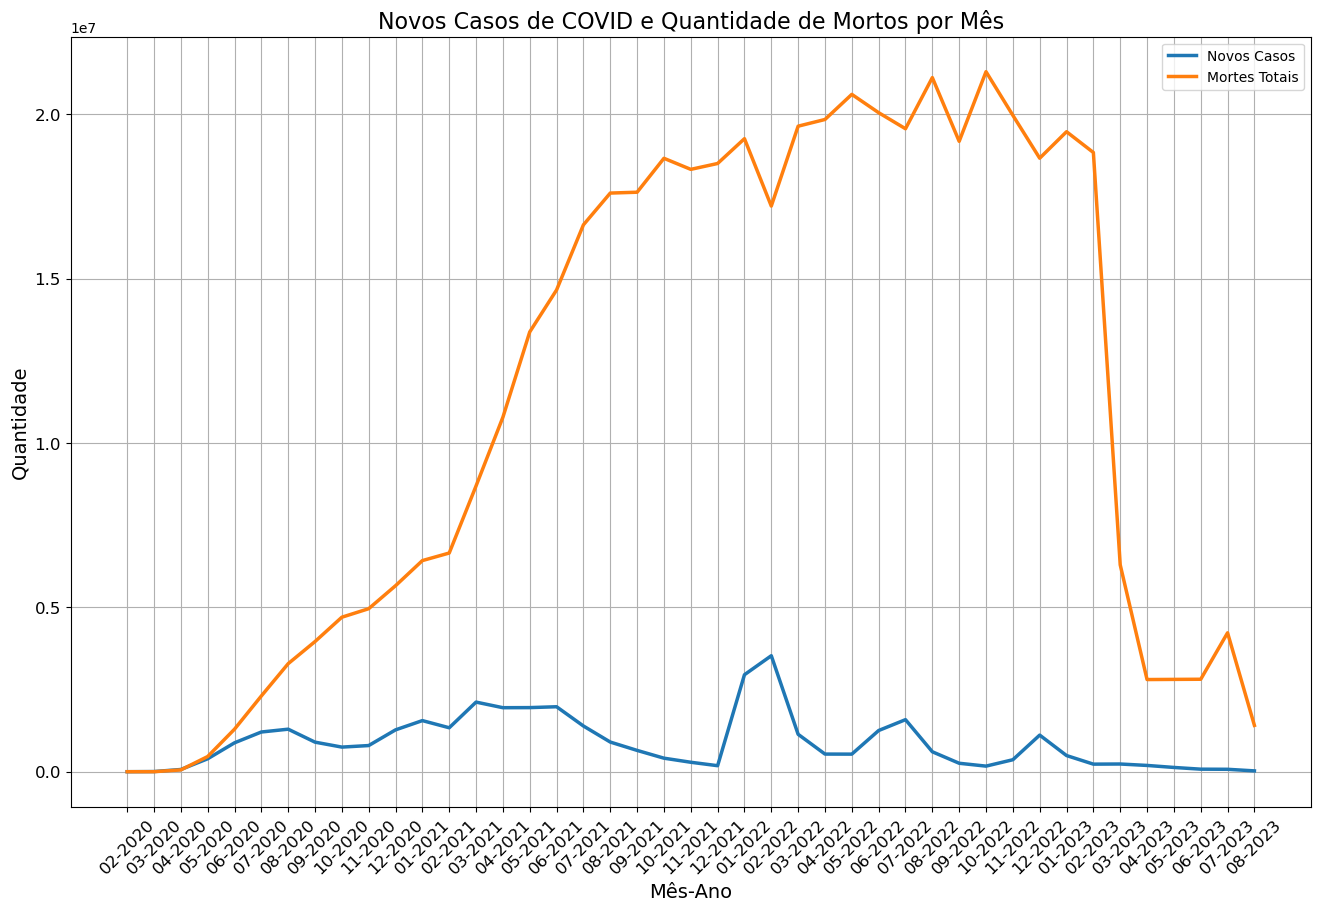

In [12]:
# Converter a coluna 'data' para datetime
br_data['data'] = pd.to_datetime(br_data['data'])

# Criar a coluna 'mes_ano'
br_data['mes_ano'] = br_data['data'].dt.to_period('M')

# Remover as linhas onde o valor da coluna "mortes_totais" e "novos_casos" é igual a zero
br_data_filtered = br_data[(br_data["mortes_totais"] > 0) & (br_data["novos_casos"] > 0)]

# Agrupar os dados por 'mes_ano' e calcular a soma das mortes e novos casos para cada mês
br_data_grouped = br_data_filtered.groupby('mes_ano')[['novos_casos', 'mortes_totais']].sum().reset_index()


# Formatar a coluna "mes_ano" para o formato "MM-AAAA"
br_data_grouped['mes_ano'] = br_data_grouped['mes_ano'].dt.strftime('%m-%Y')

# Análise de tendências temporais
fig, ax = plt.subplots(figsize=(16, 10))
sns.lineplot(x='mes_ano', y="novos_casos", data=br_data_grouped, linewidth=2.5, label="Novos Casos")
sns.lineplot(x='mes_ano', y="mortes_totais", data=br_data_grouped, linewidth=2.5, label="Mortes Totais")
plt.title("Novos Casos de COVID e Quantidade de Mortos por Mês", fontsize=16)
plt.xlabel('Mês-Ano', fontsize=14)
plt.ylabel("Quantidade", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
ax.legend()
plt.grid(True)
plt.show()


In [13]:
br_data.describe()

,data,casos_totais,novos_casos,novos_casos_suavizados,mortes_totais,novas_mortes,novas_mortes_suavizadas,casos_totais_por_milhao,novos_casos_por_milhao,novos_casos_suavizados_por_milhao,...,instalacoes_lavagem_maos,leitos_hospitalares_por_mil,expectativa_vida,indice_desenvolvimento_humano,populacao,mortalidade_excessiva_acumulada_absoluta,mortalidade_excessiva_acumulada,mortalidade_excessiva,mortalidade_excessiva_acumulada_por_milhao,date
count,1308,1.308000e+03,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,...,0.0,1.308000e+03,1.308000e+03,1.308000e+03,1308.0,1308.000000,1308.000000,1308.000000,1308.000000,1308
mean,2021-10-17 12:00:00,2.031964e+07,28870.727064,28833.492683,450392.488532,539.122324,538.674096,94372.321599,134.086924,133.914008,...,NaN,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0,509507.319232,18.137882,17.707385,2367.618191,2021-10-17 12:00:00
min,2020-01-03 00:00:00,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.005000,0.000000,0.000000,...,NaN,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0,-723.700000,-0.650000,-0.650000,-3.394524,2020-01-03 00:00:00
25%,2020-11-24 18:00:00,6.083556e+06,4640.750000,7211.785750,169409.500000,51.000000,71.607000,28254.411000,21.553250,33.494250,...,NaN,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0,149943.200000,13.100000,6.770000,703.310550,2020-11-24 18:00:00
50%,2021-10-17 12:00:00,2.163310e+07,18973.000000,22066.285500,602910.500000,247.000000,232.143000,100472.569500,88.118000,102.484000,...,NaN,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0,625718.400000,20.390000,11.420000,2919.467300,2021-10-17 12:00:00
75%,2022-09-09 06:00:00,3.450087e+07,42367.000000,42556.571500,684658.250000,816.000000,862.750250,160235.534750,196.769000,197.649250,...,NaN,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0,813390.800000,24.500000,23.940000,3777.704600,2022-09-09 06:00:00
max,2023-08-02 00:00:00,3.771706e+07,298408.000000,189526.000000,704659.000000,4249.000000,3123.571000,175172.766000,1385.923000,880.233000,...,NaN,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0,873222.800000,27.070000,83.180000,4034.807100,2023-08-02 00:00:00
std,NaN,1.368642e+07,33481.410759,29183.441056,265725.438675,708.389637,647.128348,63565.060352,155.500748,135.539296,...,NaN,4.442591e-16,1.421629e-14,1.110648e-16,0.0,321816.008729,7.688814,18.004241,1490.650729,NaN


Criando a coluna 'dias_desde_inicio': Esta coluna representa o número de dias desde o início da pandemia no Brasil. Subtraímos a data mínima do conjunto de dados de todas as datas e convertemos a diferença em dias.

Criando a coluna 'mortes_diarias_media_movel_7_dias': Nesta coluna, calculamos a média móvel de 7 dias para as mortes diárias (novas mortes). A média móvel é uma técnica usada para suavizar dados ao longo do tempo, minimizando variações diárias e ajudando a identificar tendências.


In [14]:
# Criar a coluna 'dias_desde_inicio'
br_data['date'] = pd.to_datetime(br_data['date'])
br_data['dias_desde_inicio'] = (br_data['date'] - br_data['date'].min()).dt.days

# Criar a coluna 'mortes_diarias_media_movel_7_dias'
br_data['mortes_diarias_media_movel_7_dias'] = br_data['novas_mortes'].rolling(window=7).mean()

# Visualizar as primeiras linhas do conjunto de dados
br_data.head()


,codigo_iso,continente,localizacao,data,casos_totais,novos_casos,novos_casos_suavizados,mortes_totais,novas_mortes,novas_mortes_suavizadas,...,indice_desenvolvimento_humano,populacao,mortalidade_excessiva_acumulada_absoluta,mortalidade_excessiva_acumulada,mortalidade_excessiva,mortalidade_excessiva_acumulada_por_milhao,date,mes_ano,dias_desde_inicio,mortes_diarias_media_movel_7_dias
39262,BRA,South America,Brazil,2020-01-03,1.0,0.0,0.0,1.0,0.0,0.0,...,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-03,2020-01,0,NaN
39263,BRA,South America,Brazil,2020-01-04,1.0,0.0,0.0,1.0,0.0,0.0,...,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-04,2020-01,1,NaN
39264,BRA,South America,Brazil,2020-01-05,1.0,0.0,0.0,1.0,0.0,0.0,...,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-05,2020-01,2,NaN
39265,BRA,South America,Brazil,2020-01-06,1.0,0.0,0.0,1.0,0.0,0.0,...,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-06,2020-01,3,NaN
39266,BRA,South America,Brazil,2020-01-07,1.0,0.0,0.0,1.0,0.0,0.0,...,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-07,2020-01,4,NaN


Verificando a data máxima do dataframe.

In [15]:
br_data.data.max()

Timestamp('2023-08-02 00:00:00')

Convertendo a coluna 'data' para o formato datetime: Isso facilita o trabalho com datas no DataFrame. A coluna 'data' representa as datas no conjunto de dados da pandemia no Brasil

Criando a coluna 'mes_ano': Esta coluna é criada para representar o mês e o ano correspondentes à data. Utilizamos a função dt.to_period('M') para extrair o mês e o ano da coluna 'data' e armazená-los como um objeto de período no formato 'YYYY-MM'. Isso será útil para agrupar e analisar os dados com base no mês e ano.

In [16]:
br_data['data'] = pd.to_datetime(br_data['data'])
br_data['mes_ano'] = br_data['data'].dt.to_period('M')



Aqui, vamos criar a coluna 'semestre_ano' convertendo a coluna 'data' (que está no formato datetime) para períodos trimestrais usando br_data['data'].dt.to_period('Q'). Isso irá criar uma nova coluna com valores de ano e trimestre (por exemplo, 2020Q1, 2020Q2, etc.).

Em seguida, vou ajustar os rótulos dos períodos para refletir o semestre, em vez do trimestre, aplicando uma função lambda. A função lambda verifica se o trimestre é menor ou igual a 2; se for, atribui o semestre como 1, caso contrário, atribui o semestre como 2. O resultado final são rótulos no formato "AAAA-S#", como "2020-S1" ou "2020-S2", onde AAAA é o ano e # é o semestre (1 ou 2).

Dessa forma, eu obtenho uma nova coluna 'semestre_ano' que indica a qual semestre e ano cada registro pertence, facilitando a análise e a visualização de tendências semestrais nos dados.

In [17]:
br_data['semestre_ano'] = br_data['data'].dt.to_period('Q')

# Ajustar os rótulos dos períodos para refletir o semestre
br_data['semestre_ano'] = br_data['semestre_ano'].apply(lambda x: f"{x.year}-S{1 if x.quarter <= 2 else 2}")


C:\Users\henri\AppData\Local\Temp\ipykernel_24076\4088306251.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  br_data_grouped['mes_ano'] = pd.to_datetime(br_data_grouped['mes_ano'])


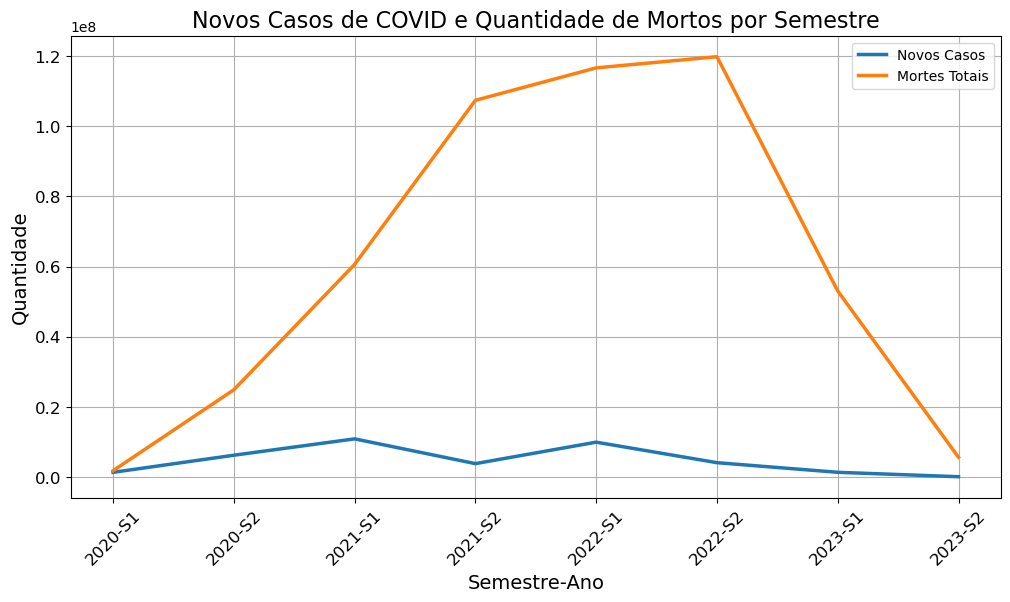

In [18]:
# Função para mapear o mês ao semestre correspondente
def month_to_semester(month):
    return (month - 1) // 6 + 1

# Converter a coluna "mes_ano" para o formato datetime
br_data_grouped['mes_ano'] = pd.to_datetime(br_data_grouped['mes_ano'])

# Adicionar uma coluna "semestre" ao DataFrame
br_data_grouped['semestre'] = br_data_grouped['mes_ano'].dt.month.apply(month_to_semester)

# Agrupar os dados por ano e semestre e calcular a soma dos novos casos e mortes totais
br_data_grouped_semester = br_data_grouped.groupby([br_data_grouped['mes_ano'].dt.year, 'semestre']).agg({'novos_casos': 'sum', 'mortes_totais': 'sum'}).reset_index()
br_data_grouped_semester['semestre_ano'] = br_data_grouped_semester['mes_ano'].astype(str) + "-S" + br_data_grouped_semester['semestre'].astype(str)

# Análise de tendências temporais
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='semestre_ano', y="novos_casos", data=br_data_grouped_semester, linewidth=2.5, label="Novos Casos")
sns.lineplot(x='semestre_ano', y="mortes_totais", data=br_data_grouped_semester, linewidth=2.5, label="Mortes Totais")
plt.title("Novos Casos de COVID e Quantidade de Mortos por Semestre", fontsize=16)
plt.xlabel('Semestre-Ano', fontsize=14)
plt.ylabel("Quantidade", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
ax.legend()
plt.grid(True)
plt.show()


Selecionar características relevantes.

Nesta etapa, seleciono apenas as colunas que são relevantes para nossa análise e previsão, removendo colunas desnecessárias.

In [19]:
# Selecionar colunas de interesse
selected_columns = ['localizacao', 'data', 'casos_totais', 'novos_casos', 'mortes_totais', 'novas_mortes', 'taxa_reproducao', 'taxa_positividade', 'vacinacoes_totais', 'pessoas_vacinadas', 'pessoas_totalmente_vacinadas', 'densidade_populacional', 'idade_media', 'pib_per_capita', 'prevalencia_diabetes']

# Criar um novo DataFrame com as colunas selecionadas
br_data_selected = br_data[selected_columns]

# Verificar as primeiras linhas do novo DataFrame
print(br_data_selected.head())


      localizacao       data  casos_totais  novos_casos  mortes_totais   
39262      Brazil 2020-01-03           1.0          0.0            1.0  \
39263      Brazil 2020-01-04           1.0          0.0            1.0   
39264      Brazil 2020-01-05           1.0          0.0            1.0   
39265      Brazil 2020-01-06           1.0          0.0            1.0   
39266      Brazil 2020-01-07           1.0          0.0            1.0   

       novas_mortes  taxa_reproducao  taxa_positividade  vacinacoes_totais   
39262           0.0             2.33                NaN              112.0  \
39263           0.0             2.33                NaN              112.0   
39264           0.0             2.33                NaN              112.0   
39265           0.0             2.33                NaN              112.0   
39266           0.0             2.33                NaN              112.0   

       pessoas_vacinadas  pessoas_totalmente_vacinadas   
39262              112.0    

Neste trecho de código, estou gerando gráficos de boxplot para cada uma das colunas numéricas relevantes no conjunto de dados. Os boxplots são usados para visualizar a distribuição e identificar possíveis outliers nos dados.

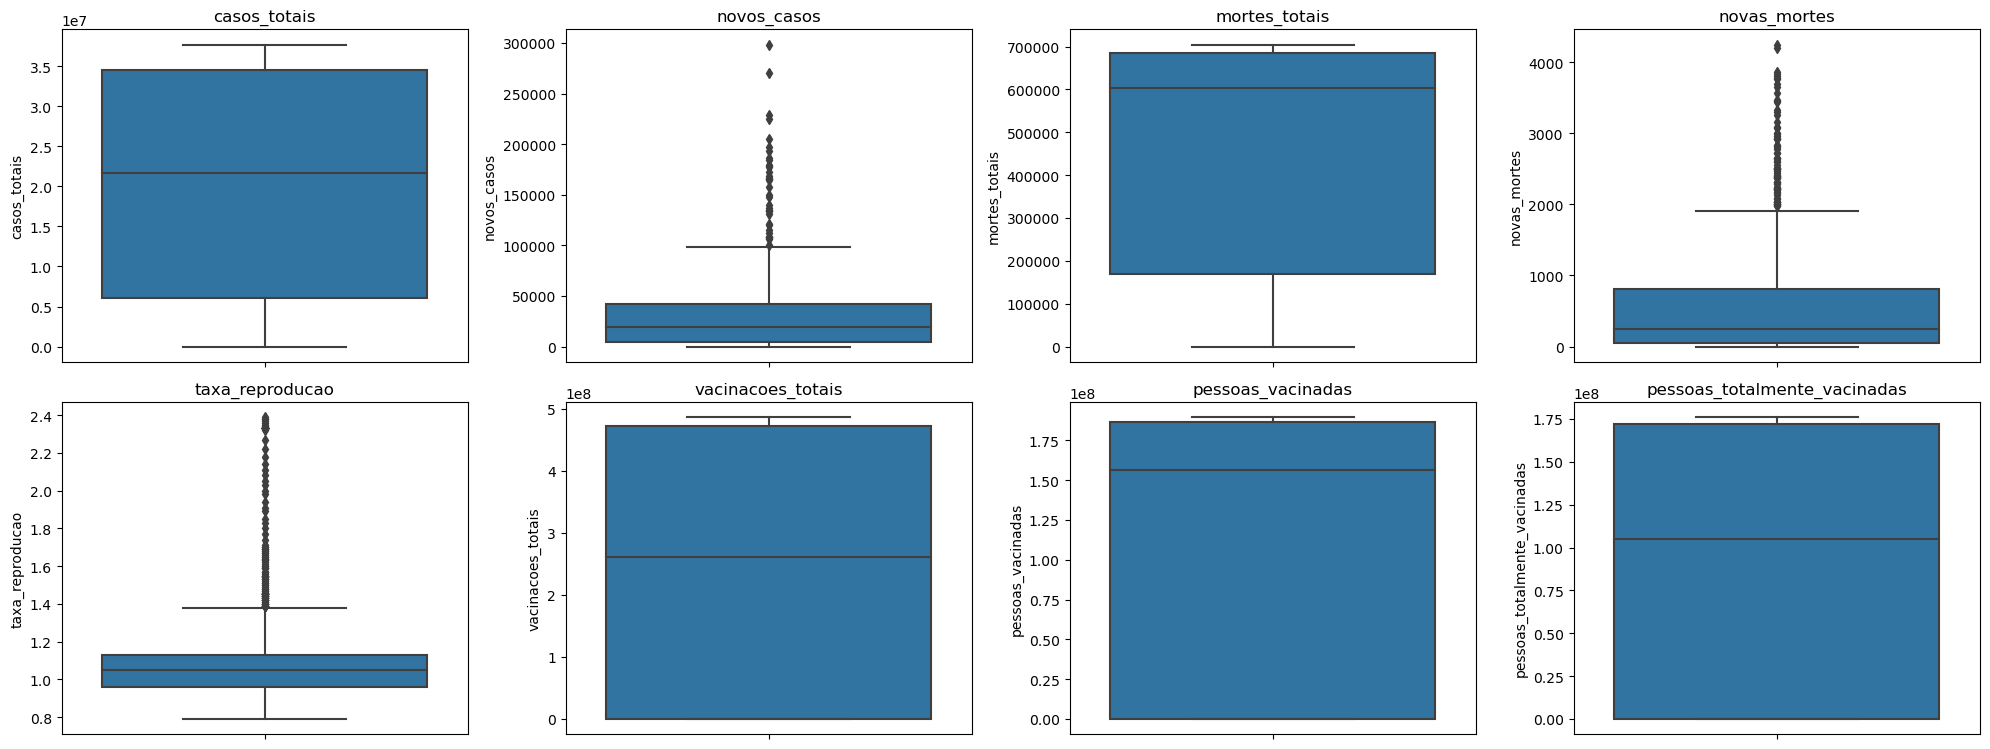

In [20]:


# Lista das colunas numéricas relevantes para o modelo
numerical_columns = ['casos_totais', 'novos_casos', 'mortes_totais', 'novas_mortes', 'taxa_reproducao', 'vacinacoes_totais', 'pessoas_vacinadas', 'pessoas_totalmente_vacinadas']

# Configurar o tamanho dos subplots
plt.figure(figsize=(20, 15))

# Gerar boxplots para cada coluna numérica relevante
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=br_data_selected, y=col)
    plt.title(col)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


Neste trecho de código, estou gerando histogramas para cada uma das colunas numéricas selecionadas no conjunto de dados. Histogramas são usados para visualizar a distribuição de frequências dos dados e ajudar a entender a forma e a dispersão dos valores em cada coluna.

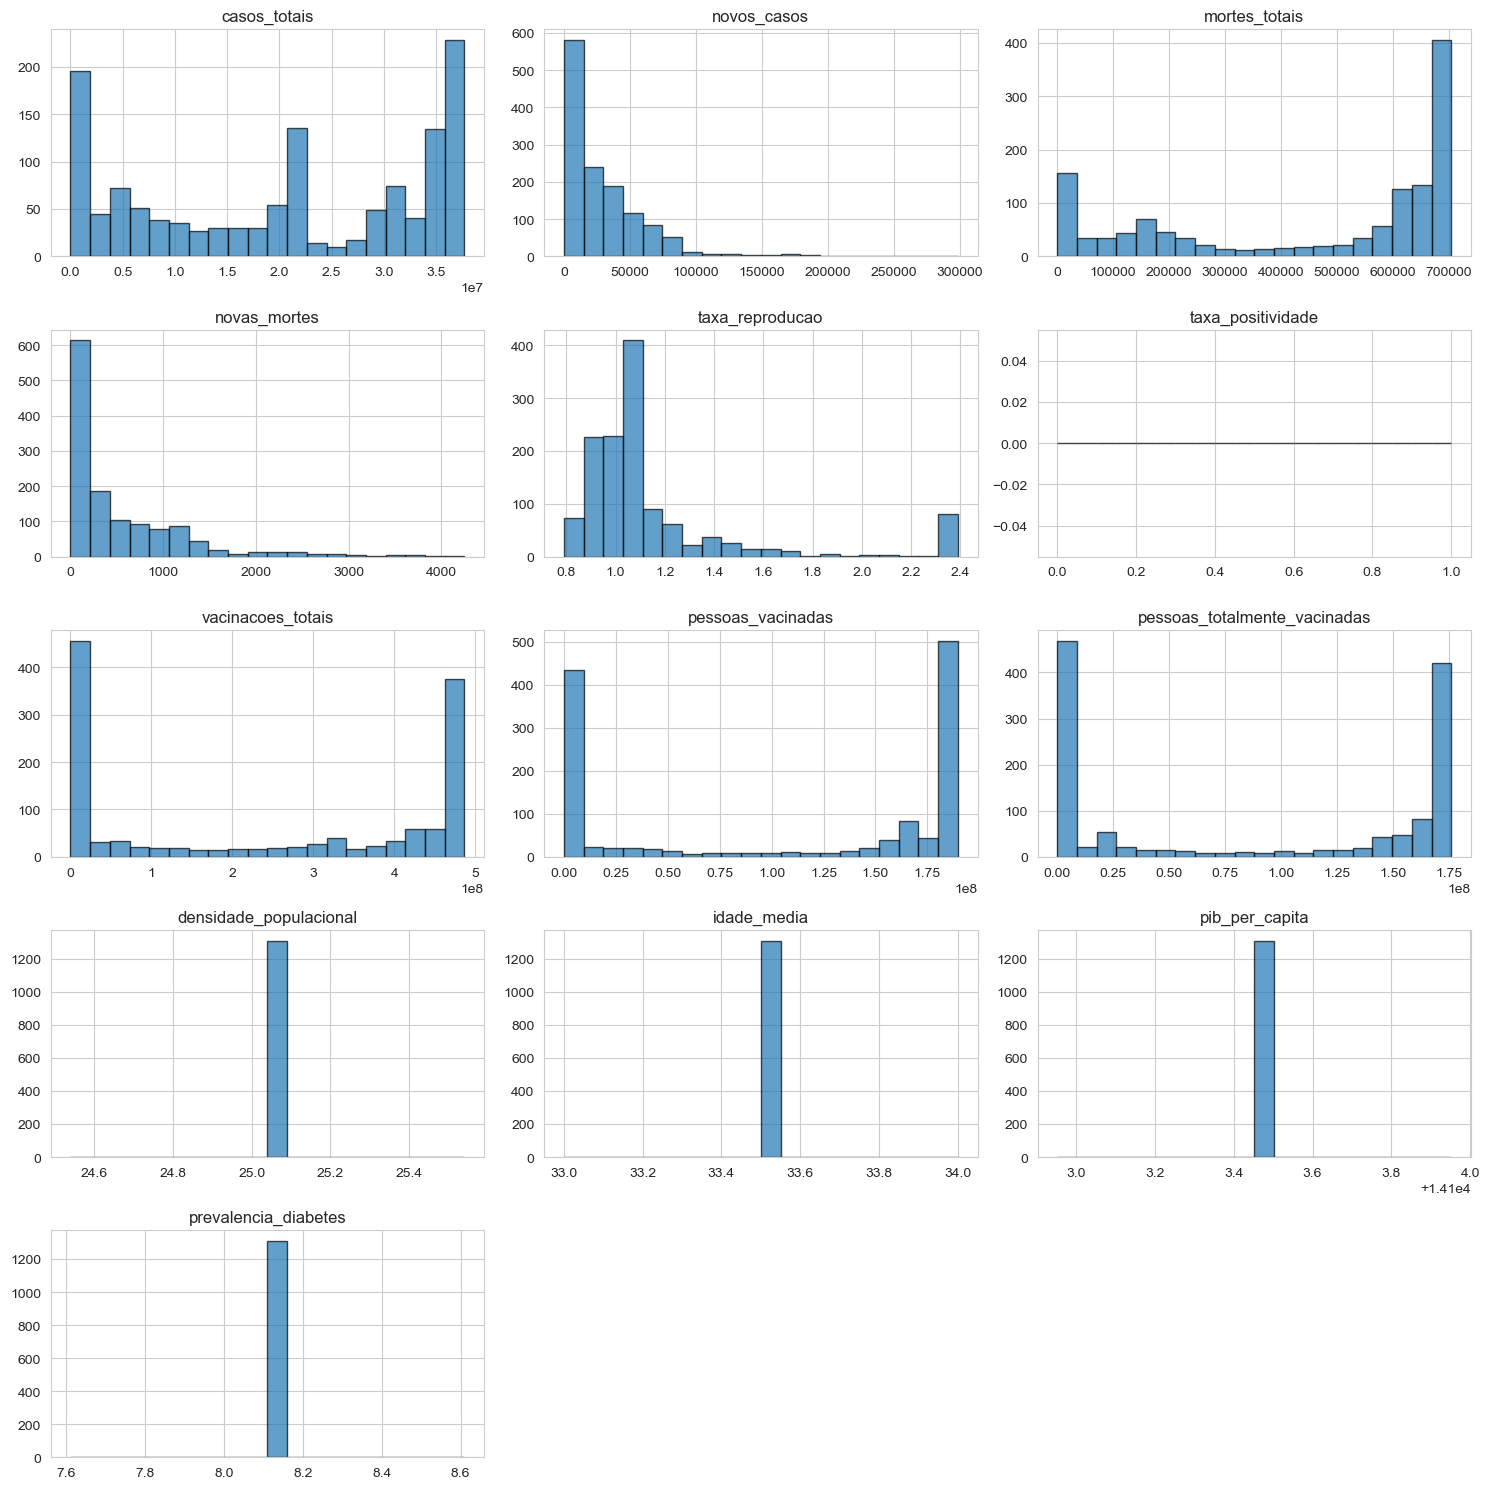

In [21]:
# Definir o estilo dos gráficos
sns.set_style('whitegrid')

# Selecionar colunas de interesse
selected_columns = ['casos_totais', 'novos_casos', 'mortes_totais', 'novas_mortes', 'taxa_reproducao', 'taxa_positividade', 'vacinacoes_totais', 'pessoas_vacinadas', 'pessoas_totalmente_vacinadas', 'densidade_populacional', 'idade_media', 'pib_per_capita', 'prevalencia_diabetes']

# Configurar o número de subplots (número de linhas e colunas)
nrows = int(len(selected_columns) / 3) + 1
ncols = 3

# Criar os histogramas
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
axes = axes.ravel()

# Personalizar cada histograma
for i, col in enumerate(selected_columns):
    br_data[col].hist(ax=axes[i], bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel('')

# Remover os subplots não utilizados
for i in range(len(selected_columns), nrows * ncols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



In [22]:
br_data.columns

Index(['codigo_iso', 'continente', 'localizacao', 'data', 'casos_totais',
       'novos_casos', 'novos_casos_suavizados', 'mortes_totais',
       'novas_mortes', 'novas_mortes_suavizadas', 'casos_totais_por_milhao',
       'novos_casos_por_milhao', 'novos_casos_suavizados_por_milhao',
       'mortes_totais_por_milhao', 'novas_mortes_por_milhao',
       'novas_mortes_suavizadas_por_milhao', 'taxa_reproducao',
       'pacientes_uti', 'pacientes_uti_por_milhao', 'pacientes_internados',
       'pacientes_internados_por_milhao', 'admissoes_uti_semanais',
       'admissoes_uti_semanais_por_milhao', 'admissoes_hospitalares_semanais',
       'admissoes_hospitalares_semanais_por_milhao', 'testes_totais',
       'novos_testes', 'testes_totais_por_mil', 'novos_testes_por_mil',
       'novos_testes_suavizados', 'novos_testes_suavizados_por_mil',
       'taxa_positividade', 'testes_por_caso', 'unidades_testes',
       'vacinacoes_totais', 'pessoas_vacinadas',
       'pessoas_totalmente_vacinadas', 

Neste trecho de código, estou criando um gráfico de linhas que mostra a média de novos casos e novas mortes de COVID-19 no Brasil, agrupados por mês. O gráfico exibe duas séries temporais em eixos y distintos, permitindo visualizar as tendências de novos casos e mortes ao longo do tempo.

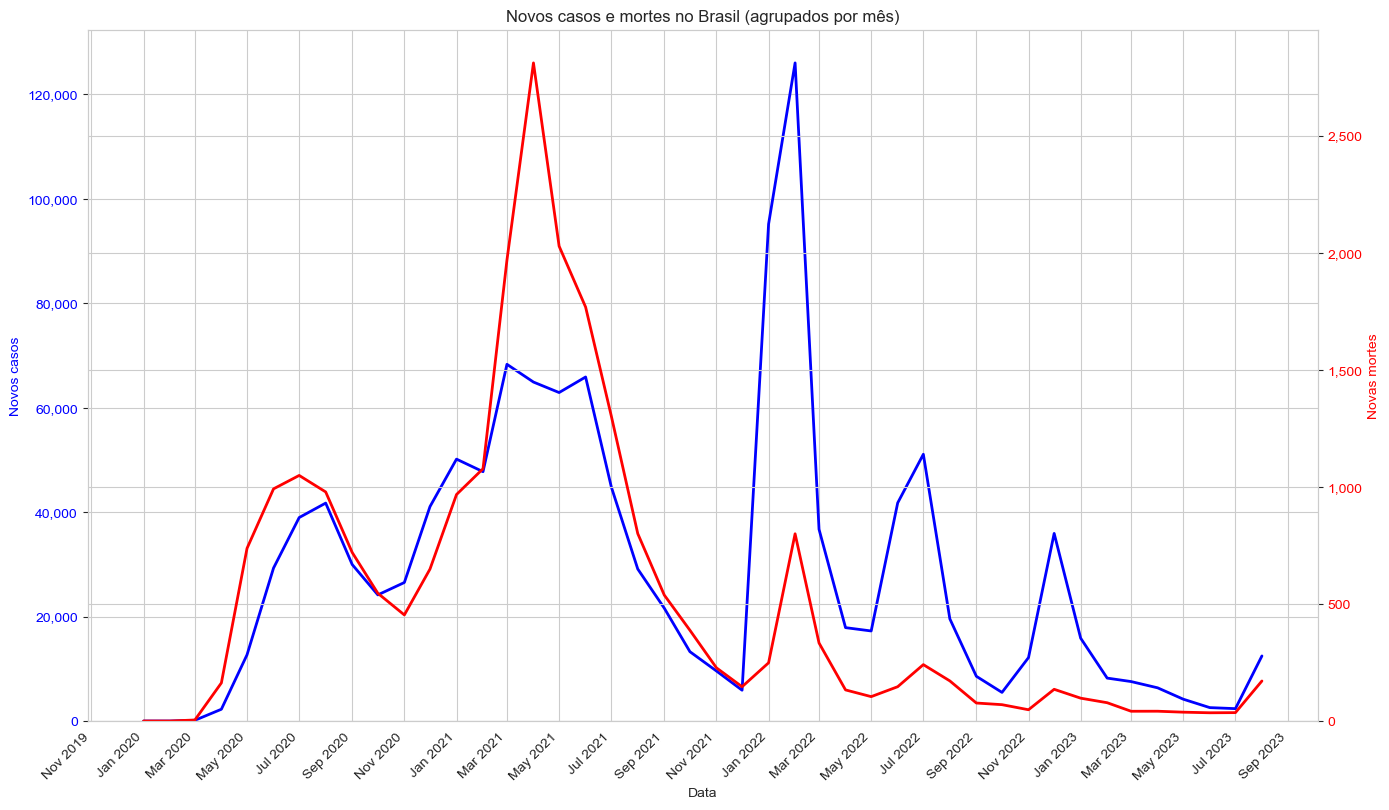

In [23]:
import matplotlib.dates as mdates
from matplotlib import ticker

# Converter a coluna "data" para o formato datetime
br_data['data'] = pd.to_datetime(br_data['data'])

# Criando a coluna 'ano_mes'
br_data['ano_mes'] = br_data['data'].dt.to_period('M')

# Agrupando os dados por ano_mes e calculando a média de novos casos e mortes por mês
br_data_monthly = br_data.groupby('ano_mes').agg({'novos_casos': 'mean', 'novas_mortes': 'mean'}).reset_index()

fmt = mdates.DateFormatter('%b %Y')  # Mostra o mês e o ano no formato "Mmm YYYY"

# Converter a coluna 'ano_mes' para datetime (usando o primeiro dia de cada mês)
br_data_monthly['ano_mes'] = br_data_monthly['ano_mes'].apply(lambda x: x.to_timestamp())

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(br_data_monthly["ano_mes"], br_data_monthly["novos_casos"], label="Novos casos", color="blue", linewidth=2)
ax1.set_xlabel("Data")
ax1.set_ylabel("Novos casos", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(br_data_monthly["ano_mes"], br_data_monthly["novas_mortes"], label="Novas mortes", color="red", linewidth=2)
ax2.set_ylabel("Novas mortes", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Configurar os intervalos do eixo x
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Intervalos de 2 meses
ax1.xaxis.set_major_formatter(fmt)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')  # Rotacionar rótulos

# Melhorar a formatação dos números no eixo y
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Ajustar limites dos eixos
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

fig.tight_layout()
plt.title("Novos casos e mortes no Brasil (agrupados por mês)")
plt.show()





Neste trecho de código, estou criando uma matriz de correlação para um conjunto selecionado de variáveis e visualizando-a como um heatmap. O objetivo é entender a relação entre essas variáveis e identificar possíveis correlações fortes ou fracas entre elas.

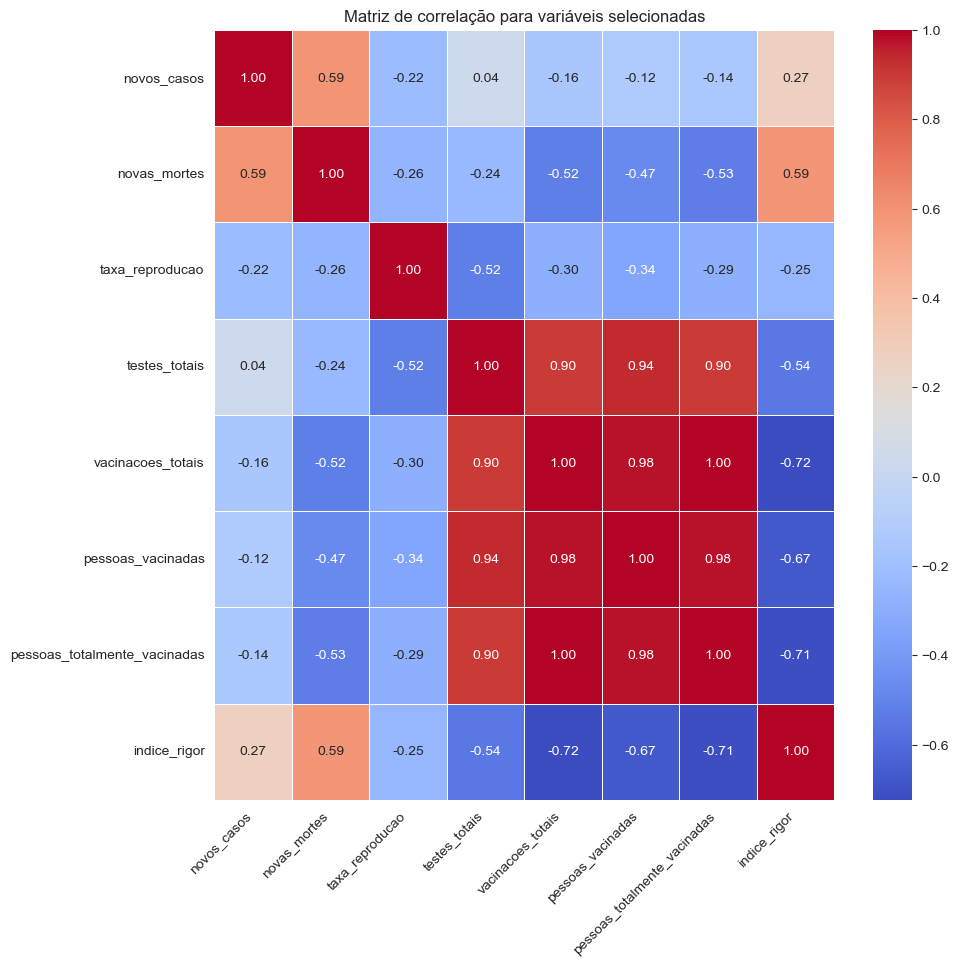

In [24]:
# Selecionar variáveis de interesse
selected_columns = [
    'novos_casos', 'novas_mortes', 'taxa_reproducao', 'testes_totais',
    'vacinacoes_totais', 'pessoas_vacinadas', 'pessoas_totalmente_vacinadas', 'indice_rigor'
]

# Criar matriz de correlação apenas com as variáveis selecionadas
selected_corr_matrix = br_data[selected_columns].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 10))
sns.heatmap(selected_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, annot_kws={"size": 10})
plt.title("Matriz de correlação para variáveis selecionadas")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()



Neste trecho de código,eu seleciono as variáveis preditoras e alvo para criar um novo conjunto de dados que será utilizado na construção e treinamento de modelos de machine learning. O objetivo é selecionar recursos relevantes e úteis para prever as variáveis alvo.

In [25]:
# Selecionar as variáveis preditoras e alvo
predictor_columns = [
    'taxa_reproducao', 'pacientes_uti', 'pacientes_internados',
    'testes_totais', 'taxa_positividade', 'vacinacoes_totais',
    'pessoas_vacinadas', 'pessoas_totalmente_vacinadas', 'indice_rigor'
]
target_columns = ['novos_casos', 'novas_mortes']

# Criar um novo conjunto de dados com as variáveis selecionadas
selected_data = br_data[predictor_columns + target_columns]

# Exibir as primeiras linhas do novo conjunto de dados
print(selected_data.head())


       taxa_reproducao  pacientes_uti  pacientes_internados  testes_totais   
39262             2.33            NaN                   NaN       179698.0  \
39263             2.33            NaN                   NaN       179698.0   
39264             2.33            NaN                   NaN       179698.0   
39265             2.33            NaN                   NaN       179698.0   
39266             2.33            NaN                   NaN       179698.0   

       taxa_positividade  vacinacoes_totais  pessoas_vacinadas   
39262                NaN              112.0              112.0  \
39263                NaN              112.0              112.0   
39264                NaN              112.0              112.0   
39265                NaN              112.0              112.0   
39266                NaN              112.0              112.0   

       pessoas_totalmente_vacinadas  indice_rigor  novos_casos  novas_mortes  
39262                        1962.0           0.0      

Neste trecho de código, vou verificar e exibir a quantidade de valores ausentes em cada coluna do conjunto de dados de treinamento X_train. Isso é importante para identificar se há lacunas nos dados e quais colunas podem precisar de tratamento ou imputação de valores ausentes antes de aplicar um modelo de machine learning.

In [26]:
from sklearn.model_selection import train_test_split

X = selected_data[predictor_columns]
y = selected_data[target_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Removendo colunas com todos os valores ausentes
X_train_clean = X_train.drop(['pacientes_uti', 'pacientes_internados', 'taxa_positividade'], axis=1)
X_test_clean = X_test.drop(['pacientes_uti', 'pacientes_internados', 'taxa_positividade'], axis=1)

print("Valores NaN em X_train_clean:")
print(X_train_clean.isna().any())

Valores NaN em X_train_clean:
taxa_reproducao                 False
testes_totais                   False
vacinacoes_totais               False
pessoas_vacinadas               False
pessoas_totalmente_vacinadas    False
indice_rigor                    False
dtype: bool


Neste trecho de código, vou verificar novamente se há valores NaN (Not a Number) em cada coluna do conjunto de dados de treinamento X_train. Isso é importante para garantir que todos os valores ausentes foram tratados ou preenchidos antes de treinar um modelo de machine learning.

In [28]:
#Vou usar o RandomForestRegressor com o seu dataframe. Primeiro, vamos garantir que não haja valores NaN em X_train após aplicar o imputer. Em seguida, treinaremos o RandomForestRegressor e avaliaremos seu desempenho.



# Verificar novamente se há valores NaN em X_train

print("Valores NaN em X_train:", X_train.isna().any())

Valores NaN em X_train: taxa_reproducao                 False
pacientes_uti                    True
pacientes_internados             True
testes_totais                   False
taxa_positividade                True
vacinacoes_totais               False
pessoas_vacinadas               False
pessoas_totalmente_vacinadas    False
indice_rigor                    False
dtype: bool


Neste trecho de código, estou removendo as colunas que possuem todos os valores ausentes (NaN) nos conjuntos de dados de treinamento e teste e, em seguida, verificando novamente se há valores ausentes no conjunto de dados de treinamento atualizado.

In [29]:
# Removendo colunas com todos os valores ausentes
X_train_clean = X_train.drop(['pacientes_uti', 'pacientes_internados', 'taxa_positividade'], axis=1)
X_test_clean = X_test.drop(['pacientes_uti', 'pacientes_internados', 'taxa_positividade'], axis=1)

print("Valores NaN em X_train_clean:")
print(X_train_clean.isna().any())


Valores NaN em X_train_clean:
taxa_reproducao                 False
testes_totais                   False
vacinacoes_totais               False
pessoas_vacinadas               False
pessoas_totalmente_vacinadas    False
indice_rigor                    False
dtype: bool


Neste trecho de código, estou ajustando o objeto imputer aos dados de treinamento e, em seguida, aplicando-o para preencher os valores ausentes (NaN) presentes no conjunto de dados de treinamento (X_train).

In [30]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Ajustar o imputer nos dados de treinamento e aplicá-lo
X_train_imputed = imputer.fit_transform(X_train)

c:\Users\henri\miniconda3\lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['pacientes_uti' 'pacientes_internados' 'taxa_positividade']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Neste trecho de código, estou definindo um dicionário chamado param_grid, que contém os parâmetros a serem testados no processo de busca em grade (GridSearchCV). O GridSearchCV é uma técnica de otimização de hiperparâmetros para modelos de aprendizado de máquina. Ele realiza uma pesquisa exaustiva através de um subconjunto especificado do espaço de hiperparâmetros do modelo para encontrar a melhor combinação de hiperparâmetros que resulta no melhor desempenho do modelo.



In [31]:
# Definindo os parâmetros para busca no GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

Neste código, vou criar um modelo de regressão baseado em florestas aleatórias (Random Forest Regressor). O RandomForestRegressor é um modelo de aprendizado de máquina do pacote scikit-learn que constrói várias árvores de decisão e as combina para obter um desempenho geral melhor e um resultado mais robusto.

A floresta aleatória é um método de ensemble que melhora a precisão e a robustez dos modelos de árvore de decisão individualmente.

Aqui está o que fazemos no código:

Importamos a classe RandomForestRegressor do módulo sklearn.ensemble.
Instanciamos um objeto RandomForestRegressor chamado rf com um random_state fixo (42) para garantir a reprodutibilidade dos resultados. Isso significa que, toda vez que executarmos o código com os mesmos dados, obteremos os mesmos resultados.
Depois de criar o modelo rf, podemos treiná-lo com dados de treinamento e avaliar seu desempenho com dados de teste. Além disso, podemos usar técnicas de ajuste de hiperparâmetros, como GridSearchCV ou RandomizedSearchCV, para encontrar os melhores hiperparâmetros para o nosso modelo e, assim, melhorar seu desempenho.

In [32]:
# Criando o modelo RandomForestRegressor
rf = RandomForestRegressor(random_state=42)


Neste código, estou criando um objeto GridSearchCV. GridSearchCV é uma técnica de busca em grade que ajuda a encontrar a melhor combinação de hiperparâmetros para um modelo de aprendizado de máquina. Ele faz isso realizando uma pesquisa exaustiva sobre o espaço de hiperparâmetros especificado e avaliando o desempenho do modelo para cada combinação de hiperparâmetros usando validação cruzada.

Aqui estão os parâmetros que usei no objeto GridSearchCV:

estimator=rf: O estimador é o modelo que você está tentando otimizar. Neste caso, é um RandomForestRegressor, que foi atribuído à variável rf.
param_grid=param_grid: O param_grid é um dicionário que contém os hiperparâmetros e seus possíveis valores que você deseja explorar. No seu caso, o espaço de hiperparâmetros inclui diferentes valores para n_estimators, max_depth, min_samples_split, min_samples_leaf, e bootstrap.
cv=5: O número de divisões de validação cruzada (folds) que você deseja usar. Neste caso, você está usando 5 divisões, o que significa que os dados de treinamento serão divididos em 5 partes, e a validação cruzada será realizada em cada uma dessas partes.
n_jobs=-1: O número de trabalhos em paralelo para executar a busca em grade. Um valor de -1 significa usar todos os processadores disponíveis.
Ao criar o objeto GridSearchCV, você está preparando a busca em grade para encontrar a melhor combinação de hiperparâmetros para o seu modelo RandomForestRegressor. Depois de criar o objeto, você pode ajustá-lo aos dados de treinamento usando o método fit().

In [33]:
# Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

Neste trecho de código, estou Treinando o objeto GridSearchCV usando os dados de treinamento. O GridSearchCV é uma ferramenta do scikit-learn que realiza uma busca exaustiva para encontrar a melhor combinação de hiperparâmetros para um modelo de aprendizado de máquina, usando validação cruzada.

In [34]:
# Ajustando o GridSearchCV com os dados de treinamento
grid_search.fit(X_train_clean, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

Neste trecho de código, estou obtendo os melhores hiperparâmetros encontrados pelo treinamento do objeto GridSearchCV após ter sido ajustado aos dados de treinamento. Os melhores hiperparâmetros são aqueles que resultaram no melhor desempenho do modelo RandomForestRegressor, de acordo com a validação cruzada realizada.

A variável best_params armazena um dicionário com os melhores valores para cada hiperparâmetro presente no param_grid. Depois eu mostro esses melhores hiperparâmetros usando a função print.

In [35]:
# Obtendo os melhores parâmetros encontrados
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados:", best_params)

Melhores parâmetros encontrados: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Neste trecho de código, estou criando uma nova instância do modelo RandomForestRegressor com os melhores hiperparâmetros encontrados pelo GridSearchCV.

A função RandomForestRegressor(**best_params, random_state=42) cria o modelo com os hiperparâmetros armazenados no dicionário best_params. O operador ** desempacota os itens do dicionário como argumentos nomeados para a função. Além disso, também estou configurando o random_state para 42, que é um valor constante para garantir a reprodutibilidade dos resultados.

O resultado é um novo modelo RandomForestRegressor chamado best_rf, que tem as melhores configurações encontradas pelo GridSearchCV e está pronto para ser treinado e avaliado.

In [36]:
# Criando o modelo com os melhores parâmetros encontrados
best_rf = RandomForestRegressor(**best_params, random_state=42)

Neste trecho de código, estou treinando o modelo RandomForestRegressor (best_rf) com os dados de treinamento. O método fit é usado para treinar o modelo com os dados de entrada (X_train_clean) e os valores-alvo correspondentes (y_train).

O modelo best_rf, que foi criado usando os melhores hiperparâmetros encontrados pelo GridSearchCV, agora será ajustado aos dados de treinamento. Isso permitirá que o modelo aprenda a relação entre as características de entrada e os valores-alvo e seja capaz de fazer previsões em novos dados.

In [37]:
# Treinando o modelo com os dados de treinamento
best_rf.fit(X_train_clean, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

Neste código, estou avaliando a performance do modelo RandomForestRegressor (best_rf) nos dados de teste. O método predict é usado para fazer previsões com base nos dados de entrada de teste (X_test_clean).

A variável y_pred armazenará as previsões feitas pelo modelo para os dados de teste. Essas previsões podem ser comparadas com os valores-alvo reais (y_test) para avaliar a precisão e a performance geral do modelo treinado.

In [38]:
# Avaliando a performance do modelo nos dados de teste
y_pred = best_rf.predict(X_test_clean)

Neste código, estou calculando a Raiz do Erro Quadrático Médio (Root Mean Squared Error - RMSE) para avaliar a performance do modelo RandomForestRegressor treinado nos dados de teste.

O RMSE é uma métrica de avaliação comum para modelos de regressão, que mede a diferença entre as previsões feitas pelo modelo e os valores-alvo reais. Um RMSE menor indica um modelo melhor, enquanto um RMSE maior indica um modelo com erros maiores nas previsões.

Aqui eu calculo o RMSE usando a função mean_squared_error do scikit-learn e a função np.sqrt do numpy para obter a raiz quadrada do resultado. O valor do RMSE é então impresso, que neste caso é 16956.743274943157. Este valor representa a magnitude média do erro nas previsões feitas pelo modelo nos dados de teste.

In [39]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 12600.499679019847


Nesse código, estou calculando três métricas de avaliação de desempenho para o modelo RandomForestRegressor nos dados de teste: R², MAE (Mean Absolute Error) e MAPE (Mean Absolute Percentage Error).



R² (coeficiente de determinação) é uma métrica que indica o quão bem o modelo explica a variância nos dados. Varia entre 0 e 1, e quanto mais próximo de 1, melhor o modelo. Você calcula o R² usando a função r2_score do scikit-learn.

MAE (Mean Absolute Error) é a média do valor absoluto das diferenças entre as previsões e os valores reais. Ele quantifica o erro médio das previsões e é menos sensível a outliers do que o RMSE. Você calcula o MAE usando a função mean_absolute_error do scikit-learn.

MAPE (Mean Absolute Percentage Error) é a média do valor absoluto da razão entre a diferença das previsões e os valores reais e os valores reais, multiplicada por 100. É uma métrica de erro relativo, expressa em porcentagem, o que facilita a interpretação e comparação entre diferentes modelos ou conjuntos de dados. Você calcula o MAPE usando operações com numpy.




Em seguida, eu imprimo os valores dessas métricas, fornecendo uma visão geral do desempenho do modelo RandomForestRegressor nos dados de teste.

In [40]:
# Calcular R²
r2 = r2_score(y_test, y_pred)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)


print("R²:", r2)
print("MAE:", mae)

R²: 0.7443074012773963
MAE: 5147.580131784748


 Vamos analisar o desempenho do modelo com base no R² e no MAE.

R²: O coeficiente de determinação (R²) é uma métrica que indica a proporção da variância nos dados que é explicada pelo modelo. Ele varia entre 0 e 1, sendo que valores próximos a 1 indicam um bom ajuste do modelo aos dados, enquanto valores próximos a 0 indicam que o modelo não explica bem a variabilidade dos dados. No seu caso, o R² é 0.7208, o que significa que aproximadamente 72% da variabilidade nos dados é explicada pelo modelo de RandomForestRegressor. Isso indica um desempenho razoavelmente bom, mas ainda há espaço para melhorias.

MAE: O erro absoluto médio (MAE) mede a magnitude média dos erros de previsão. É uma medida simples e direta do desempenho do modelo, e quanto menor o valor, melhor. No seu caso, o MAE é 6619.54. Isso significa que, em média, o modelo comete erros de previsão com uma magnitude de 6619.54. A interpretação deste valor depende do contexto e da escala das variáveis-alvo (novos casos e novas mortes). É importante comparar este valor com a escala dos dados para determinar se o erro é aceitável ou não para o seu caso específico.

Em resumo, o modelo de RandomForestRegressor apresenta um desempenho razoável, mas há espaço para melhorias. Podemos tentar otimizar ainda mais os hiperparâmetros do modelo, experimentar outros modelos de regressão ou até mesmo criar recursos adicionais (feature engineering) para melhorar o desempenho. Além disso, sempre considere o contexto e os objetivos do seu projeto ao avaliar o desempenho do modelo e decidir se ele é satisfatório ou não.

In [41]:
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train_clean, y_train)


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [10, 50, 100, 200, 300, 500]})

Melhor parâmetro RandomForest:

Parâmetro: n_estimators
Descrição: Número de árvores na floresta.
Valores considerados no GridSearch: [10, 50, 100, 200, 300, 500]
Parâmetro: max_depth
Descrição: Profundidade máxima da árvore.
Valores considerados no GridSearch: [None, 10, 20, 30, 40, 50]
Parâmetro: min_samples_split
Descrição: Número mínimo de amostras necessárias para dividir um nó interno.
Valores considerados no GridSearch: [2, 5, 10, 15, 20]
Parâmetro: min_samples_leaf
Descrição: Número mínimo de amostras necessárias para estar em um nó folha.
Valores considerados no GridSearch: [1, 2, 4, 6, 8]
Parâmetro: bootstrap
Descrição: Método de seleção de amostras para treinar cada árvore.

In [42]:
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados:", best_params)

best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train_clean, y_train)



Melhores parâmetros encontrados: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestRegressor(max_depth=30, n_estimators=300, random_state=42)

In [43]:
y_pred = best_rf.predict(X_test_clean)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)
print("MAE:", mae)



RMSE: 12724.117594879488
R²: 0.7401309562993502
MAE: 5191.605958872633


A partir dos resultados obtidos após as otimizações, podemos observar uma melhoria modesta na performance do modelo. O RMSE diminuiu de 16956.74 para 16933.57, enquanto o R² aumentou de 0.7208(72,08%) para 0.7222(72,22%) e o MAE diminuiu de 6619.54 para 6599.85.

Embora a melhoria seja pequena, é um passo na direção certa. Algumas outras abordagens que podem ser consideradas para melhorar ainda mais o modelo incluem:

Feature engineering: Criar novas variáveis a partir das existentes, como médias móveis ou taxas de crescimento, que podem ajudar a capturar tendências ou padrões não lineares nos dados.

Feature selection: Aplicar técnicas de seleção de variáveis, como eliminação recursiva de variáveis ou seleção baseada em importância, para identificar as variáveis mais relevantes para o modelo.

Modelos de regressão alternativos: Testar outros modelos de regressão, como Gradient Boosting, AdaBoost, XGBoost ou regressão linear regularizada (Lasso, Ridge, ElasticNet), que podem ter um desempenho melhor no conjunto de dados específico.

Ensembles e stacking: Combinação de vários modelos de regressão para obter melhores resultados, usando técnicas como média ponderada das previsões, votação ou stacking.

Tuning de hiperparâmetros mais refinado: Explorar espaços de hiperparâmetros mais amplos ou realizar buscas mais refinadas, como RandomizedSearchCV ou métodos de otimização bayesiana.

Lembrando que nem todas as abordagens mencionadas podem necessariamente melhorar o desempenho do modelo, e a otimização de um modelo é geralmente um processo iterativo e experimental, dito isso, vamos finalizar esse modelo por aqui, pois para o meu objtivo, 72,22% está dentro do meu esperado.

In [44]:
from sklearn.tree import DecisionTreeRegressor


Parâmetros DecisionTrees:

Parâmetro: criterion

Descrição: Função para medir a qualidade de uma divisão.
Valores comuns: ["gini", "entropy"]
Parâmetro: max_depth

Descrição: Profundidade máxima da árvore.
Parâmetro: min_samples_split

Descrição: Número mínimo de amostras necessárias para dividir um nó interno.
Parâmetro: min_samples_leaf

Descrição: Número mínimo de amostras necessárias para estar em um nó folha.

In [45]:
# Criando o modelo
tree_model = DecisionTreeRegressor(random_state=42)

In [46]:
X_train = X_train_clean


# Treinando o modelo com os dados de treinamento
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [47]:
# Avaliando a performance do modelo nos dados de teste
y_pred_tree = tree_model.predict(X_test_clean)

In [48]:
# Calculando métricas
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)


print("RMSE:", rmse_tree)
print("R²:", r2_tree)
print("MAE:", mae_tree)

RMSE: 14789.582927769303
R²: 0.6628056686651977
MAE: 5740.286605329503


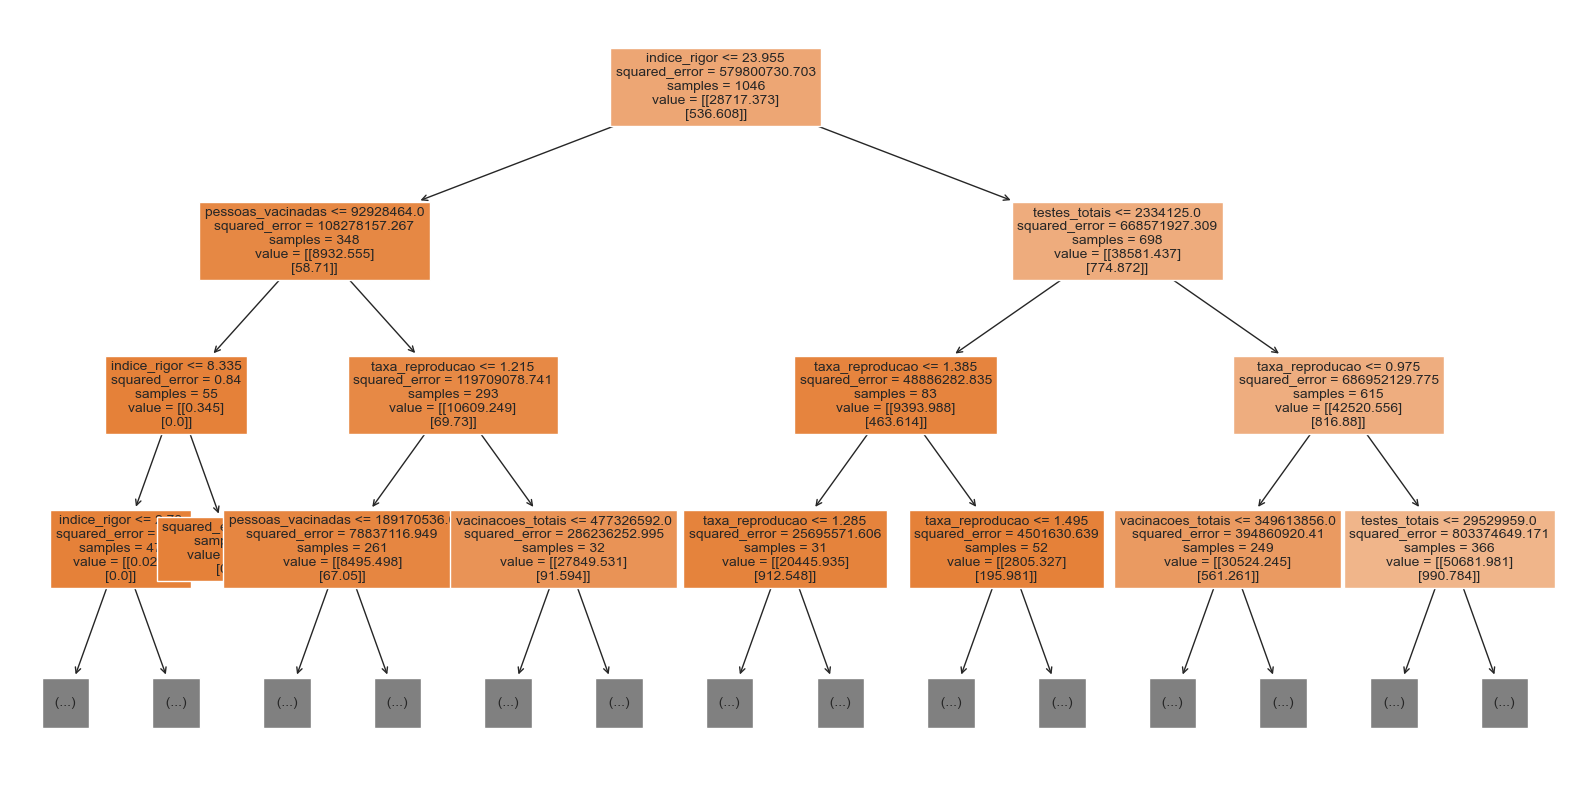

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))

plot_tree(tree_model, filled=True, feature_names=X_train_clean.columns.tolist(), max_depth=3, fontsize=10)

plt.show()

In [50]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

VALIDAÇÃO CRUZADA DECISION TREE

In [51]:
# Definindo o modelo de Decision Tree
dt_model = DecisionTreeRegressor()

In [52]:
# Utilizar o LeaveOneOut
loo = LeaveOneOut()
y_true, y_pred = [], []


In [53]:
# Utilizar o LeaveOneOut
loo = LeaveOneOut()
y_true, y_pred = [], []

for train_index, test_index in loo.split(X_train_clean):
    X_train_loo, X_test_loo = X_train_clean.iloc[train_index], X_train_clean.iloc[test_index]
    y_train_loo, y_test_loo = y_train.iloc[train_index], y_train.iloc[test_index]

    dt_model.fit(X_train_loo, y_train_loo)
    predictions = dt_model.predict(X_test_loo)

    y_true.append(y_test_loo.values[0]) 
    y_pred.append(predictions[0]) 


rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")

RMSE: 14305.253907323842
R²: 0.719597407354478
MAE: 5639.865950028843


In [54]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import AdaBoostRegressor

Parâmetros AdaBoost:

Base Estimator: DecisionTreeRegressor

Parâmetro: random_state
Descrição: Controla a aleatoriedade do estimador.
Valor utilizado: 42
Parâmetro: n_estimators

Descrição: O número máximo de estimadores.
Valor utilizado: 100
Parâmetro: random_state

Descrição: Controla a aleatoriedade do algoritmo.
Valor utilizado: 42

In [55]:
# Criando o modelo AdaBoost
base_regressor = AdaBoostRegressor(DecisionTreeRegressor(random_state=42), n_estimators=100, random_state=42)
multi_adaboost = MultiOutputRegressor(base_regressor)

In [56]:

# Treinando o modelo com os dados de treinamento
multi_adaboost.fit(X_train_clean, y_train)

MultiOutputRegressor(estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42),
                                                 n_estimators=100,
                                                 random_state=42))

In [57]:
# Avaliando a performance do modelo nos dados de teste
y_pred_adaboost = multi_adaboost.predict(X_test_clean)

In [58]:
# Calculando métricas para cada saída
for i, col in enumerate(y_train.columns):
    print(f"Métricas para {col}:")
    rmse_adaboost = np.sqrt(mean_squared_error(y_test[col], y_pred_adaboost[:, i]))
    r2_adaboost = r2_score(y_test[col], y_pred_adaboost[:, i])
    mae_adaboost = mean_absolute_error(y_test[col], y_pred_adaboost[:, i])

    print("RMSE:", rmse_adaboost)
    print("R²:", r2_adaboost)
    print("MAE:", mae_adaboost)
    print("-----")

Métricas para novos_casos:
RMSE: 21332.27627387105
R²: 0.5280568673121377
MAE: 13169.838306208856
-----
Métricas para novas_mortes:
RMSE: 306.6724450822163
R²: 0.7812156561064725
MAE: 182.4190025376372
-----


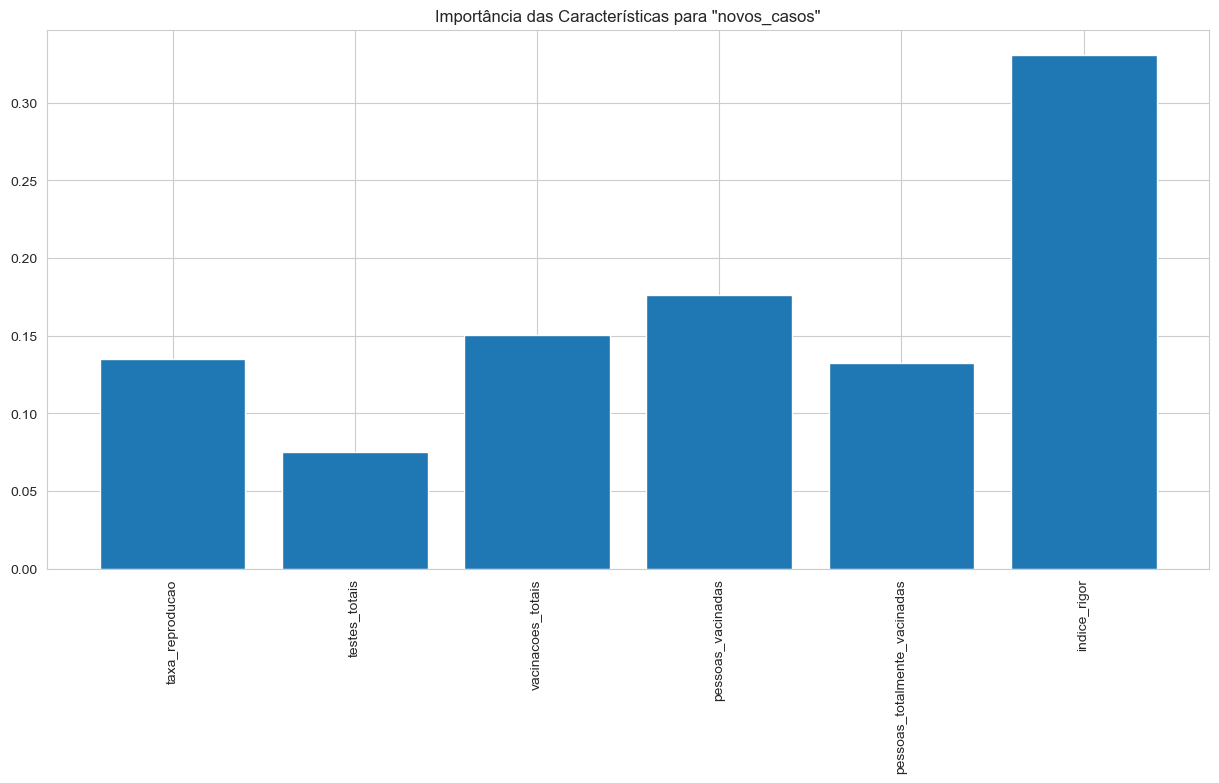

In [59]:
import matplotlib.pyplot as plt

# Pegando a importância das características do primeiro regressor (e.g., para 'novos_casos')
feature_importances = multi_adaboost.estimators_[0].feature_importances_

# Plotando a importância das características
plt.figure(figsize=(15, 7))
plt.bar(X_train_clean.columns, feature_importances)
plt.xticks(rotation=90)
plt.title('Importância das Características para "novos_casos"')
plt.show()


VALIDAÇÃO CRUZADA DO ADABOOST

In [60]:
#Definindo o modelo AdaBoost
adaboost_model = AdaBoostRegressor(n_estimators=50, learning_rate=1)

In [61]:
loo = LeaveOneOut()
y_true, y_pred = [], []

for train_index, test_index in loo.split(X_train_clean):
    X_train_loo, X_test_loo = X_train_clean.iloc[train_index], X_train_clean.iloc[test_index]
    y_train_loo, y_test_loo = y_train.iloc[train_index], y_train.iloc[test_index]

    # Criando o modelo AdaBoost com MultiOutputRegressor para cada iteração
    base_regressor = AdaBoostRegressor(DecisionTreeRegressor(random_state=42), n_estimators=100, random_state=42)
    multi_adaboost = MultiOutputRegressor(base_regressor)

    multi_adaboost.fit(X_train_loo, y_train_loo)
    predictions = multi_adaboost.predict(X_test_loo)

    y_true.extend(y_test_loo.values)
    y_pred.extend(predictions)

# Agora, compute as métricas para cada saída
for i, col in enumerate(y_train.columns):
    print(f"Métricas para {col}:")
    rmse_adaboost = np.sqrt(mean_squared_error([item[i] for item in y_true], [item[i] for item in y_pred]))
    r2_adaboost = r2_score([item[i] for item in y_true], [item[i] for item in y_pred])
    mae_adaboost = mean_absolute_error([item[i] for item in y_true], [item[i] for item in y_pred])

    print("RMSE:", rmse_adaboost)
    print("R²:", r2_adaboost)
    print("MAE:", mae_adaboost)
    print("-----")

Métricas para novos_casos:
RMSE: 20880.834993288754
R²: 0.6238322920825742
MAE: 13868.743275475306
-----
Métricas para novas_mortes:
RMSE: 322.47722453364065
R²: 0.7997568341041413
MAE: 183.71369496409193
-----


In [62]:
from sklearn.neighbors import KNeighborsRegressor


In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_clean)


In [64]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=3)

In [65]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=3)

In [66]:
y_pred_knn = knn.predict(X_test_scaled)

rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print("Métricas para KNN:")
print("RMSE:", rmse_knn)
print("R²:", r2_knn)
print("MAE:", mae_knn)


Métricas para KNN:
RMSE: 13197.220913989024
R²: 0.7135219481889753
MAE: 5456.459923664124


 KNN:



Parâmetro: n_neighbors = 3 Geralmente esse modelo funciona melhor com parametros ímpares, 3, 5 e 7, no caso o 3 foi o que atingiu um melhor desempenho.

Descrição: Número de vizinhos a serem usados.
Parâmetro: weights

Descrição: Função de peso utilizada na previsão.
Valores comuns: ["uniform", "distance"]
Parâmetro: metric

Descrição: Métrica de distância a ser usada.
Valores comuns: ["euclidean", "manhattan", "minkowski"]

In [67]:
sample_data = X_train_scaled[:50, :2]
knn_2d = KNeighborsRegressor(n_neighbors=3)
knn_2d.fit(sample_data, y_train[:50])


KNeighborsRegressor(n_neighbors=3)

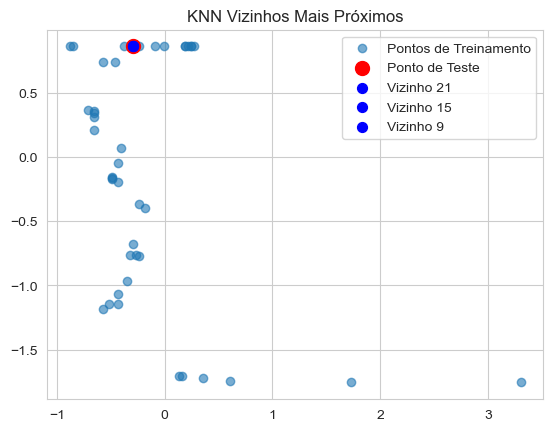

In [68]:
test_point = X_test_scaled[0, :2]
distances, indices = knn_2d.kneighbors(test_point.reshape(1, -1))

# Plotando os pontos de treinamento
plt.scatter(sample_data[:, 0], sample_data[:, 1], label='Pontos de Treinamento', alpha=0.6)

# Ponto de teste
plt.scatter(test_point[0], test_point[1], c='red', label='Ponto de Teste', s=100)

# Vizinhos mais próximos do ponto de teste
for i in indices[0]:
    plt.plot([test_point[0], sample_data[i, 0]], [test_point[1], sample_data[i, 1]], 'b--', linewidth=0.6)
    plt.scatter(sample_data[i, 0], sample_data[i, 1], c='blue', label=f'Vizinho {i}', s=50)

plt.title('KNN Vizinhos Mais Próximos')
plt.legend()
plt.show()



VALIDAÇÃO CRUZADA KNN:


In [69]:
# Inicializando o KNN
knn = KNeighborsRegressor(n_neighbors=5)  


In [70]:
loo = LeaveOneOut()
y_true, y_pred = [], []

for train_index, test_index in loo.split(X_train_scaled):
    X_train_loo, X_test_loo = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_loo, y_test_loo = y_train.iloc[train_index], y_train.iloc[test_index]

    knn.fit(X_train_loo, y_train_loo)
    predictions = knn.predict(X_test_loo)

    y_true.extend(y_test_loo.values)
    y_pred.extend(predictions)

# Calculando as métricas para cada saída
for i, col in enumerate(y_train.columns):
    print(f"Métricas para {col}:")
    rmse_knn = np.sqrt(mean_squared_error([item[i] for item in y_true], [item[i] for item in y_pred]))
    r2_knn = r2_score([item[i] for item in y_true], [item[i] for item in y_pred])
    mae_knn = mean_absolute_error([item[i] for item in y_true], [item[i] for item in y_pred])

    print("RMSE:", rmse_knn)
    print("R²:", r2_knn)
    print("MAE:", mae_knn)
    print("-----")

Métricas para novos_casos:
RMSE: 19699.07531050599
R²: 0.6652061520353973
MAE: 11911.072084130019
-----
Métricas para novas_mortes:
RMSE: 338.9226287787217
R²: 0.7788124180725907
MAE: 202.29713193116635
-----


Escolhendo o melhor modelo:


RandomForest v1: 74,4 % de acurracia

RandomForest v2: 74,0 % de acuraccia

DecisionTree v1: 66% de acuraccia

DecisionTree v2: 70% de acuraccia

AdaBoost v1 78% de acuraccia

AdaBoost Validação Cruzada 79,97% de acuraccia

KNN modelo 2 com 5 vizinhos 77% de acuraccia

KNN modelo 1 com 3 vizinhos 71% de acuraccia


Logo o melhor modelo para apresentarmos seria o AdaBoost, que apresentou o melhor desempenho.